# Modelo de regresi√≥n log√≠stica

## 1. Exploraci√≥n inicial

### 1.1 Importaci√≥n de librer√≠as necesarias para el an√°lisis

In [2784]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math

### 1.2 Lectura del archivo csv

In [2785]:
#Leer el archivo con el m√©todo read de pandas
data = pd.read_csv('../data/healthcaredatasetstrokedata.csv')

In [2786]:
#Visualizar los primeros 5 registros del dataset
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [2787]:
#Visualizar los √∫ltimos 5 registros del dataset
data.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [2788]:
#Visualizar los nombres de las columnas
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [2789]:
#Visualizar el tipo de dato de las columnas
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### 1.3 An√°lisis exploratorio de los datos

Se utilizar√° el m√©todo info() para identificar valores faltantes, comprender el tipo de dato de cada una de nuestras variables y empezar a planear la limpieza y el preprocesamiento de los datos.

In [2790]:
#Informaci√≥n relevante sobre cada una de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


El resultado anterior refleja la presencia de valores nulos en la variable bmi, este es el √≠ndice de masa corporal. 

A continuaci√≥n, se realizar√° un an√°lisis estad√≠stico descriptivo del dataset utilizando el m√©todo describe(). Este procedimiento proporciona una visi√≥n general de las variables num√©ricas, incluyendo m√©tricas como la media, desviaci√≥n est√°ndar, valores m√≠nimo y m√°ximo, as√≠ como los percentiles. Estos indicadores permiten identificar distribuciones sesgadas, posibles anomal√≠as o valores at√≠picos. Adem√°s, el conteo de valores por columna puede servir como una primera aproximaci√≥n para detectar la presencia de valores nulos, ya que cualquier discrepancia con el total de registros podr√≠a indicar datos faltantes.

In [2791]:
#An√°lisis descriptivo de la base de datos
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

Observaciones:

- **Edad** El promedio de edad entre todas las personas registradas en el dataset es de 43.22 a√±os. 

- **Hipertensi√≥n** Cerca del 9.7 % de la poblaci√≥n registrada tiene hipertensi√≥n.

- **Enfermedad** card√≠aca Solo el 5.4 % de la poblaci√≥n registrada presenta una condici√≥n de este tipo.

- **Nivel promedio de glucosa** El promedio de glucosa en la sangre de la poblaci√≥n registrada es de 106.15 mg/dL. Y el rango de los registrados va desde un m√≠nimo de 55.12 mg/dL hasta un m√°ximo de 271.73 mg/dL

- **√çndice de masa corporal** La media y la mediana estan cercanas a 28, lo que seg√∫n la OMS indica una tendencia general hacia el sobrepeso (IMC entre 25 y 30), esto sugiere que la mayor√≠a de la poblaci√≥n registrada no se encuentra en un rango saludable de peso. Adem√°s encontramos datos m√≠nimos de 10 y m√°ximos de 97, lo que indica que hay personas con desnutrici√≥n severa, probablemente casos cl√≠nicos graves y personas con lo que se calificaria como un caso de obesidad morbida extrema, estos valores extremos pueden tratarse de casos reales.

- **Accidente cerebrovascular** Solo un 4.9 % de la poblaci√≥n registrada a sufrido un accidente cerebrovascular.

#### Registros duplicados

In [2792]:
#Presentar la suma de registros duplicados
data.duplicated().sum()

np.int64(0)

#### Valores nulos

En esta etapa del an√°lisis exploratorio, se evalu√≥ la existencia de valores nulos en el conjunto de datos mediante la funci√≥n data.isnull().sum(), la cual permite contar cu√°ntos valores faltantes existen en cada columna. Los resultados muestran que la √∫nica columna con valores nulos es bmi, con un total de 201 registros faltantes.

In [2793]:
#Sumar la cantidad de valores nulos que hay por columna
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

A continuaci√≥n, se calcul√≥ el porcentaje que estos valores nulos representan respecto al total de observaciones en el dataset. Considerando que el dataset contiene 5110 registros, los 201 valores faltantes en la variable bmi equivalen aproximadamente al 3.93% del total. Este porcentaje es relativamente bajo, por lo que no se justifica la eliminaci√≥n de toda la columna ni de todos los registros afectados. En su lugar, se aplicar√° una estrategia de imputaci√≥n que se detalla m√°s adelante.

In [2794]:
#Calculando el porcentaje que reflejan los valores nulos en el dataset
total = data.shape[0]
non_nulls = data['bmi'].count()
nulls = total - non_nulls
percentage_nulls = (nulls/total)*100
print(f"{percentage_nulls:.2f}%")

3.93%


Se utiliz√≥ un heatmap para visualizar gr√°ficamente la ubicaci√≥n de los valores nulos en el dataset. Esta representaci√≥n visual confirma que los nulos se encuentran √∫nicamente en la columna bmi.

<Axes: >

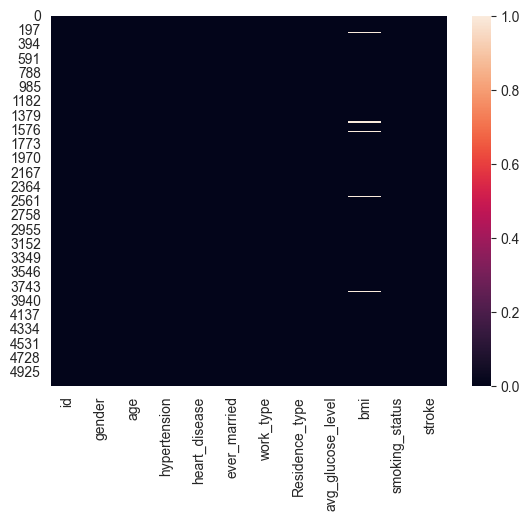

In [2795]:
#Creando visualizaci√≥n de valores nulos
sns.heatmap(data.isnull())

#### Valores extremos

En esta secci√≥n se realiza un an√°lisis gr√°fico de los valores extremos (outliers) presentes en las variables num√©ricas del conjunto de datos, excluyendo aquellas que representan identificadores o variables categ√≥ricas binarias como id, stroke, heart_disease e hypertension. Para ello, se utilizaron diagramas de caja, los cuales permiten visualizar la distribuci√≥n de los datos y detectar posibles valores at√≠picos de forma clara.

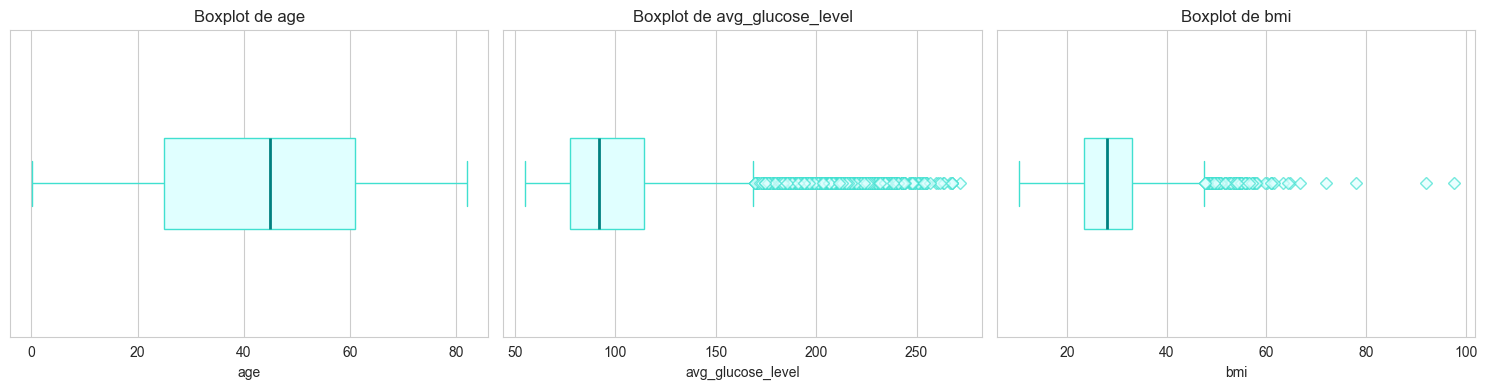

In [2796]:
sns.set_style("whitegrid")

#Filtrando las oclumnas que utilizaremos para graficar el diagrama de cajas
numeric_columns = data.select_dtypes(include='number').columns

numeric_columns =  numeric_columns.drop(['stroke','heart_disease','hypertension','id'])

# Define la cantidad de columnas en la cuadr√≠cula de subplots
n_cols = 3
# Calcula el n√∫mero necesario de filas para acomodar todos los gr√°ficos
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

# Crea una figura y una cuadr√≠cula de subplots con el tama√±o adecuado
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Convierte el arreglo 2D de ejes en una lista plana para facilitar la iteraci√≥n
axes = axes.flatten() 

# Itera sobre cada columna num√©rica seleccionada para crear su respectivo boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(
        x=data[column].dropna(),
        ax=axes[i],
        width=0.3,
        boxprops=dict(facecolor='lightcyan', edgecolor='turquoise'),
        medianprops=dict(color='teal', linewidth=2),
        whiskerprops=dict(color='turquoise'),
        capprops=dict(color='turquoise'),
        flierprops=dict(marker='D', markerfacecolor='lightcyan', markeredgecolor='turquoise', alpha=0.7)
    )
    # T√≠tulo y etiqueta del eje x
    axes[i].set_title(f'Boxplot de {column}', fontsize=12)
    axes[i].set_xlabel(column)


# Elimina cualquier subplot restante que no se haya usado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta el dise√±o de los subplots para evitar superposiciones
plt.tight_layout()

# Muestra los gr√°ficos
plt.show()

Para identificar la cantidad de outliers en las variables num√©ricas del conjunto de datos y sus valores exactos, se utiliz√≥ el m√©todo del **rango intercuart√≠lico (IQR)**. Este enfoque se basa en calcular el primer cuartil y el tercer cuartil de cada variable, y a partir de estos obtener el IQR como:

$$
\text{IQR} = Q_3 - Q_1
$$

Luego, se establecen los l√≠mites inferior y superior para detectar valores extremos utilizando las siguientes f√≥rmulas:

$$
\text{L√≠mite inferior} = Q_1 - 1.5 \times \text{IQR}
$$

$$
\text{L√≠mite superior} = Q_3 + 1.5 \times \text{IQR}
$$


In [2797]:
#Seleccionar solo las columnas num√©ricas de nuestro dataset, .columns obtiene solo los nombres de esas columnas.
numeric_columns = data.select_dtypes(include='number').drop(columns=['hypertension','heart_disease','stroke']).columns

#Diccionario para guardar outliers por columna, la clave es el nombre de la columna, y el valor la lista de outliers.
outliers_dict = {}

#Iterar sobre cada nombre de columna de las columnas num√©ricas
for column in numeric_columns:
    #Extrae la columna como una Serie de pandas
    data_outliers = data[column]
    #Con el m√©todo quantile calculamos el primer cuartil
    Q1 = data_outliers.quantile(0.25)
    #Calculamos el tercer cuartil
    Q3 = data_outliers.quantile(0.75)
    #Calulamos el rango intercuart√≠lico
    IQR = Q3 - Q1
    #Caluclamos el l√≠mite inferior
    lower_bound = Q1-1.5*IQR
    #Calculamos el l√≠mite superior
    upper_bound = Q3+1.5*IQR
    #Filtrar los valores que se encuentran fuera del intervalo, estos son los considerados outliers
    outliers = data_outliers[(data_outliers<lower_bound)|(data_outliers>upper_bound)]

    #Verifica si hay outliers
    if not outliers.empty:
        #Guarda cada clave (nombre de la columna) con su valor (lista de outliers)
        outliers_dict[column] = outliers.to_list()

#Recorrer el diccionario para imprimir los outliers
for column_name, values in outliers_dict.items():
    print(f"{column_name} ‚Üí {len(values)} outliers: {values[:10]}{'...' if len(values) > 10 else ''}")

avg_glucose_level ‚Üí 627 outliers: [228.69, 202.21, 171.23, 174.12, 186.21, 219.84, 214.09, 191.61, 221.29, 217.08]...
bmi ‚Üí 110 outliers: [48.9, 56.6, 50.1, 54.6, 60.9, 54.7, 48.2, 64.8, 54.7, 49.8]...


En el caso de la variable avg_glucose_level, se identificaron 627 valores at√≠picos seg√∫n el rango intercuart√≠lico. Sin embargo, **estos no ser√°n eliminados del an√°lisis** ya que corresponden a niveles de glucosa que son cl√≠nicamente posibles. En contextos m√©dicos, es com√∫n encontrar pacientes con hiperglucemia severa, especialmente entre personas con diabetes no controlada. Por tanto, remover estos registros implicar√≠a perder informaci√≥n valiosa sobre individuos con condiciones de salud relevantes que el modelo debe ser capaz de identificar y aprender. 

Respecto a la variable bmi, se detectaron 110 valores at√≠picos. Aunque estos valores se alejan de la distribuci√≥n t√≠pica, **tampoco ser√°n descartados**. Existen personas con √≠ndices de masa corporal significativamente elevados debido a condiciones como la obesidad m√≥rbida, o bien, con valores bajos por trastornos de alimentaci√≥n u otros problemas de salud. Estos casos son reales y cl√≠nicamente importantes. Dado que uno de los objetivos del an√°lisis es identificar patrones asociados a riesgos de salud, es fundamental conservar estos datos para no sesgar el an√°lisis hacia un subconjunto de la poblaci√≥n m√°s saludable.

#### Limpieza de los datos

Debido a que no encontramos registros duplicados, y mantendremos los outliers debido a las razones explicadas anteriormente, nuestra limpieza ser√° √∫nicamente el tratamiento de valores nulos.

Para iniciar el proceso de limpieza, se realiz√≥ una copia del DataFrame original utilizando df = data.copy(). Esta pr√°ctica es fundamental para preservar la integridad de los datos originales y evitar modificaciones accidentales sobre el conjunto de datos inicial. Trabajar con una copia nos permite aplicar transformaciones, pruebas y preprocesamiento sin riesgo de perder informaci√≥n o alterar datos que podr√≠an ser necesarios en futuras comparaciones o an√°lisis.

In [2798]:
#Creando una copia del DataFrame original
df = data.copy()

A continuaci√≥n, se realiz√≥ la imputaci√≥n de valores nulos en la variable bmi, que conten√≠a registros faltantes. Para ello, se utiliz√≥ la clase SimpleImputer de la biblioteca sklearn.impute, configurada con la estrategia 'mean', la cual reemplaza los valores faltantes con la media de la columna.

In [2799]:
#clase que permite reemplazar los valores NaN por una estrategia determinada
from sklearn.impute import SimpleImputer
#Se crea una instancia del imputador y se indica que la estrategia utilizada ser√° la media.
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
#Se aplica el imputador a la columna bmi
df['bmi'] = imputer.fit_transform(df[['bmi']])

#### Distribuciones de las variables

Como parte del an√°lisis exploratorio de datos, se realiz√≥ la visualizaci√≥n de la distribuci√≥n de cada una de las variables num√©ricas y categ√≥ricas binarias del dataset. Esto permite comprender la forma en la que se distribuyen los datos, identificar posibles sesgos, asimetr√≠as y la necesidad de realizar transformaciones o ajustes adicionales. Para ello se utilizaron histogramas con curvas de densidad suavizada que ofrecen una visi√≥n clara de la forma de cada variable.

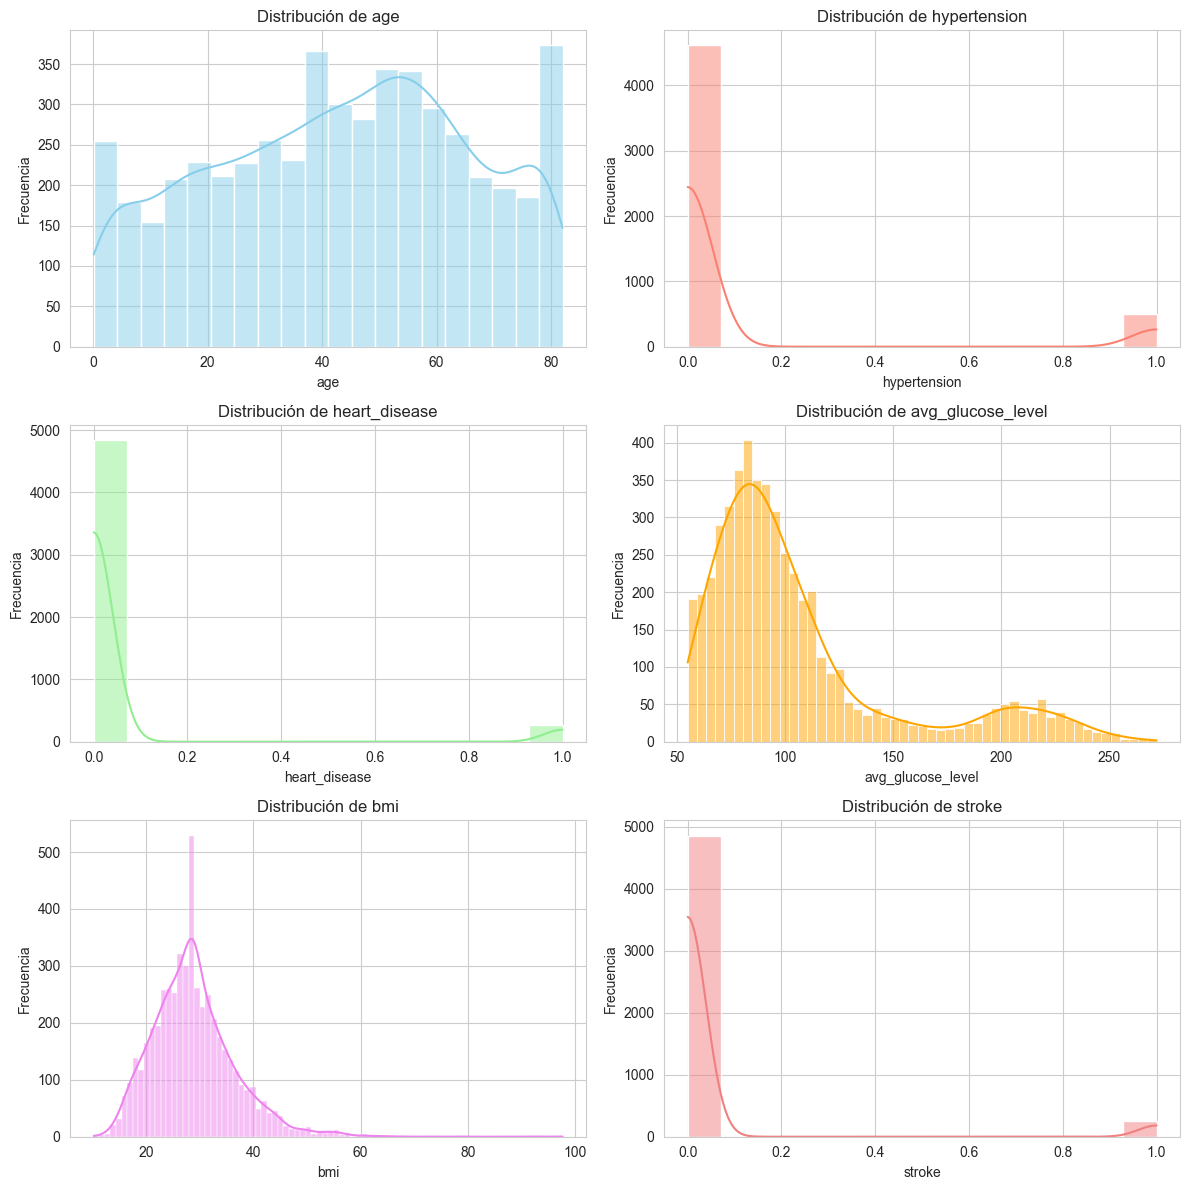

In [2800]:
# Seleccionamos solo las columnas num√©ricas (int y float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Eliminamos la columna 'id' ya que no es una variable √∫til para an√°lisis estad√≠stico
numeric_cols = numeric_cols.drop('id')

# Calculamos el n√∫mero total de variables num√©ricas seleccionadas
num_vars = len(numeric_cols)

# Definimos el n√∫mero de columnas por fila para los subplots
cols = 2  

# Calculamos el n√∫mero de filas necesarias para acomodar todos los gr√°ficos
rows = (num_vars + 1) // cols

# Definimos una lista de colores personalizados para los histogramas
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'lightcoral', 'khaki']

# Ajustamos el tama√±o general de la figura seg√∫n la cantidad de filas
plt.figure(figsize=(12, rows * 4))

# Iteramos sobre cada variable num√©rica para crear su histograma
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')


# Ajustamos el espacio entre los subplots para que no se sobrepongan
plt.tight_layout()

# Mostramos todos los gr√°ficos
plt.show()

La variable age muestra una distribuci√≥n relativamente uniforme en adultos, con picos en los grupos de edad de 40 a 60 a√±os y un aumento notorio hacia los extremos, principalmente en los adultos mayores. Se observan tambi√©n frecuencias elevadas en los valores m√≠nimos, lo que indica una concentraci√≥n de pacientes pedi√°tricos o j√≥venes. Esta variable parece estar bien distribuida sin sesgos severos.

hypertension es una variable binaria que toma los valores 0 y 1. Como se observa en el gr√°fico, existe un fuerte desbalance: la mayor√≠a de los individuos no presenta hipertensi√≥n. Heart_disease tambi√©n es binaria y presenta una gran concentraci√≥n en el valor 0, lo cual indica que la gran mayor√≠a de los registros no tiene enfermedades card√≠acas.

La variable avg_glucose_level presenta una distribuci√≥n asim√©trica a la derecha, lo que indica que la mayor√≠a de las personas tienen niveles de glucosa promedio moderados, pero existe un grupo con niveles significativamente altos. Esto es coherente con casos de hiperglucemia o diabetes y tambi√©n justifica por qu√© hay outliers v√°lidos en esta variable. La curva de densidad muestra adem√°s una peque√±a acumulaci√≥n secundaria en valores altos, lo que podr√≠a representar un subgrupo con riesgo elevado.

La distribuci√≥n de bmi es tambi√©n asim√©trica a la derecha, aunque en menor medida que la glucosa. La mayor√≠a de los individuos tiene un IMC entre 20 y 35, con algunos valores elevados que representan casos de obesidad severa. 

stroke es nuestra variable objetivo, y representa si un individuo ha sufrido o no un accidente cerebrovascular. La distribuci√≥n es altamente desbalanceada: la gran mayor√≠a de los registros no ha sufrido un ACV, mientras que los casos positivos son escasos. Este desbalance es representa un desaf√≠o importante, ya que nuestrp modelo puede tender a predecir siempre la clase mayoritaria. Por ello, m√°s adelante se aplicaran t√©cnicas para balancear los datos.



#### Relaci√≥n entre edad y el n√∫mero de casos de stroke

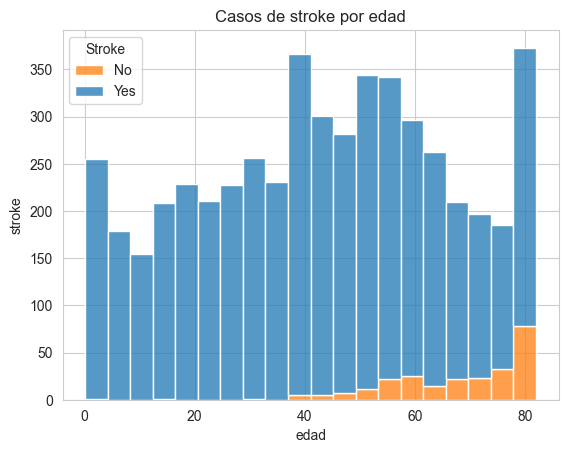

In [2801]:
#Relaci√≥n entre edad y n√∫mero de casos de stroke
sns.histplot(data=df,x='age', hue='stroke',multiple='stack')
#T√≠tulo del gr√°fico
plt.title('Casos de stroke por edad')
#Leyenda para identificar casos positivos y negativos
plt.legend(title='Stroke',labels={'Yes','No'})
#T√≠tulo eje x
plt.xlabel('edad')
#T√≠tulo eje y
plt.ylabel('stroke')
#Mostrar gr√°fico
plt.show()

Se observa claramente que los casos positivos de stroke comienzan a aparecer con mayor frecuencia a partir de los 40 a√±os, y su proporci√≥n aumenta significativamente en edades superiores, especialmente en personas mayores de 60 a√±os. Por esta raz√≥n, la variable age es relevante para la predicci√≥n de accidentes cerebrovasculares. Su influencia directa sobre la probabilidad de sufrir un evento de este tipo la convierte en una de las variables predictoras m√°s importantes dentro del conjunto de datos, por lo que se incluir√° en los entrenamientos del modelo.

#### Examinando el desbalance en nuestra variable a predecir (strokes)

Para comprender mejor la composici√≥n del conjunto de datos respecto a la variable objetivo stroke, se realiz√≥ primero un conteo de los casos positivos y negativos mediante el m√©todo value_counts(). Esto permiti√≥ identificar cu√°ntos individuos del total han sufrido un accidente cerebrovascular (stroke = 1) y cu√°ntos no (stroke = 0). Como resultado, se obtuvo que solo 249 de los 5110 registros (aproximadamente un 4.9%) presentan un caso de stroke, mientras que los 4861 restantes (95.1%) no han sufrido un ACV. Esta clara desproporci√≥n confirma que **la variable est√° altamente desbalanceada**.

In [2802]:
#Contando casos positivos y negativos
stroke_counts = df['stroke'].value_counts()
stroke_counts

stroke
0    4861
1     249
Name: count, dtype: int64

Para visualizar gr√°ficamente esta distribuci√≥n, se utiliz√≥ un gr√°fico de pastel que muestra la proporci√≥n de ambos grupos. En la gr√°fica, el segmento azul representa los casos sin stroke y ocupa el 95.1% del c√≠rculo, mientras que el otro segmento resalta los casos positivos los cuales ocupan el 4.9%. 

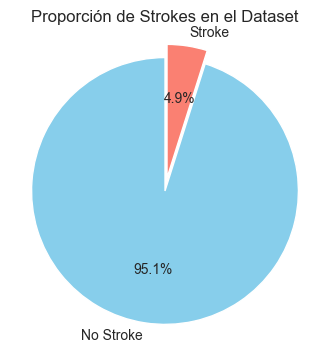

In [2803]:
#Etiquetas por categor√≠a
labels = ['No Stroke', 'Stroke']

#Definir colores
colors = ['skyblue', 'salmon']

#Destacar categor√≠a
explode = [0, 0.1]  

#Tama√±o del gr√°fico
plt.figure(figsize=(4,4))

#Creando gr√°fico
plt.pie(stroke_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

#T√≠tulo del gr√°fico
plt.title('Proporci√≥n de Strokes en el Dataset')

#Perfectamente circular
plt.axis('equal')  

#Mostrar gr√°fico
plt.show()

#### Relaci√≥n entre G√©nero y Probabilidad de Sufrir un Stroke

In [2804]:
#Cuenta cu√°ntos registros hay por categor√≠a de genero
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [2805]:
#Eliminamos la categor√≠a other ya que solo es un registro y no es significativo para el modelo
df = df.drop(df[df['gender'] == 'Other'].index)

A continuaci√≥n, se calcula la proporci√≥n de personas que sufrieron stroke en cada g√©nero, dividiendo el n√∫mero de casos positivos por el total de personas de ese grupo.

In [2806]:
#Proporci√≥n de strokes por g√©nero
stroke_rate_gender = df.groupby('gender')['stroke'].mean()
stroke_rate_gender

gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64

Aunque la diferencia no es muy grande, se observa que los hombres tienen una tasa ligeramente mayor de stroke en este dataset, a pesar de tener menos registros. Asimismo, estimamos cu√°ntos casos de stroke habr√≠a en cada grupo:

In [2807]:
#Valores esperados por g√©nero
stroke_count_gender = stroke_rate_gender*df['gender'].value_counts()
stroke_count_gender

gender
Female    141.0
Male      108.0
dtype: float64

A pesar de que la tasa en hombres es mayor, el n√∫mero absoluto de strokes en mujeres es m√°s alto, simplemente porque hay m√°s mujeres en el dataset.

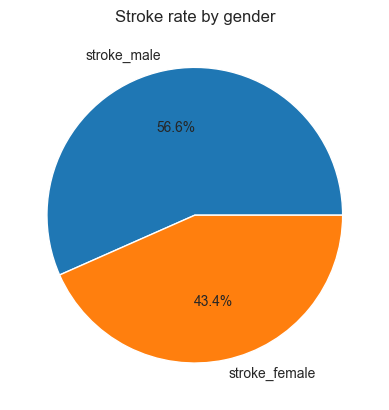

In [2808]:
#Generar gr√°fico de pastel
plt.pie(stroke_count_gender,labels=['stroke_male','stroke_female'],autopct='%1.1f%%')
#T√≠tulo del gr√°fico
plt.title('Stroke rate by gender')
#Mostrar el gr√°fico
plt.show()

#### Relaci√≥n entre el Tabaquismo y la Incidencia de Stroke

En esta parte se analiza la relaci√≥n entre el estado de tabaquismo de los individuos y la incidencia de stroke en el conjunto de datos. Inicialmente, se utiliz√≥ value_counts() para observar la distribuci√≥n de las categor√≠as dentro de la variable smoking_status, encontrando que la mayor√≠a de los pacientes nunca han fumado, seguidos por aquellos con estatus desconocido, exfumadores y fumadores actuales.

In [2809]:
#Contando registros por categor√≠a
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [2810]:
#Calculando tasa promedio de stroke por categor√≠a
stroke_rate_smoking = df.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking

smoking_status
Unknown            0.030440
formerly smoked    0.079186
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64

Los resultados indican que el grupo con mayor tasa de stroke es el de personas que dejaron de fumar (formerly smoked), con un 7.92%, seguido por fumadores actuales (5.32%), personas que nunca fumaron (4.76%) y, finalmente, aquellos con estatus desconocido (3.04%). 

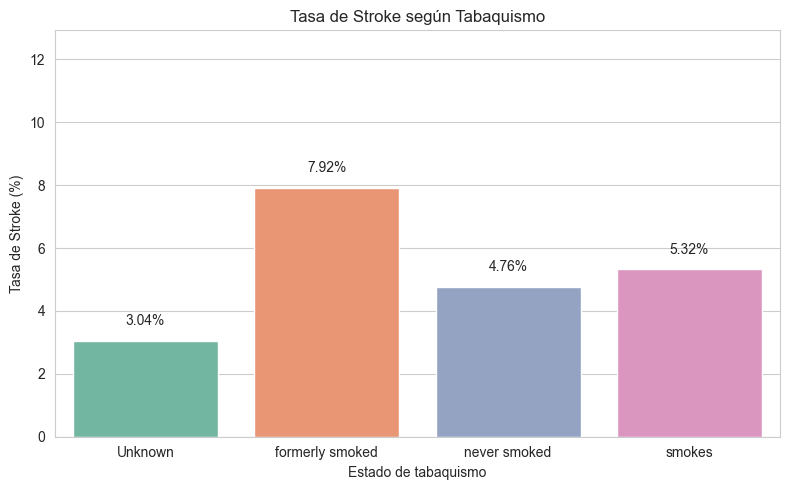

In [2811]:
warnings.filterwarnings("ignore",category=FutureWarning)

#Convertir tasas a porcentajes
stroke_rate_percent = stroke_rate_smoking * 100

#Tma√±o del gr√°fico
plt.figure(figsize=(8, 5))

#Construcci√≥n del gr√°fico
sns.barplot(x=stroke_rate_percent.index, y=stroke_rate_percent.values, palette='Set2')

#T√≠tulo del gr√°fico
plt.title('Tasa de Stroke seg√∫n Tabaquismo')
#Eje y del gr√°fico
plt.ylabel('Tasa de Stroke (%)')
#Eje x del gr√°fico
plt.xlabel('Estado de tabaquismo')
#Ajusta espacio
plt.ylim(0, stroke_rate_percent.max() + 5)

#Recorre barras para agregar datos
for i, val in enumerate(stroke_rate_percent.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

#Ajusta gr√°ficos
plt.tight_layout()

#Mostrar gr√°fico
plt.show()

Es importante destacar que los exfumadores presentan una tasa notablemente m√°s alta, lo cual podr√≠a reflejar secuelas acumuladas del consumo previo. Por lo tanto, esta variable tiene un papel predictivo importante para el modelo.

#### Impacto de la Hipertensi√≥n en la Incidencia de Stroke

Se analiza la variable hypertension, que indica si una persona ha sido diagnosticada con presi√≥n arterial alta (1) o no (0). Mediante value_counts() se observ√≥ que el 90% de los registros corresponden a personas sin hipertensi√≥n, mientras que un 10% presenta esta condici√≥n. 

In [2812]:
#Contar cuantos registros presentan hipertensi√≥n
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

Se agruparon los datos por la presencia o ausencia de hipertensi√≥n y se calcul√≥ la media de la variable stroke para cada grupo, lo que representa la proporci√≥n de personas con stroke dentro de cada categor√≠a. Los resultados muestran que solo el 3.97% de las personas sin hipertensi√≥n sufrieron un stroke, mientras que entre quienes s√≠ tienen hipertensi√≥n la tasa se eleva al 13.25%. Por esta raz√≥n, consideraremos esta variable como predictora en nuestro modelo.

In [2813]:
#Proporci√≥n de personas con stroke
stroke_rate_hypertension = df.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
0    0.039688
1    0.132530
Name: stroke, dtype: float64

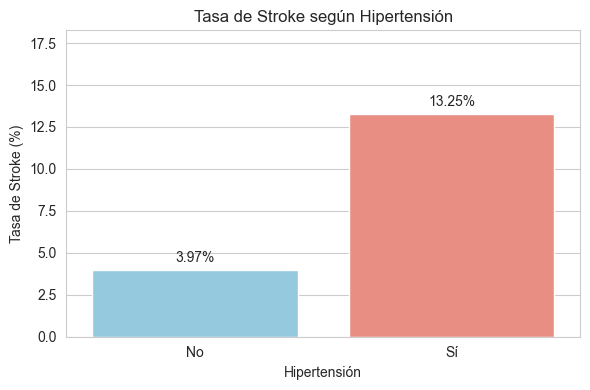

In [2814]:
#Convertir a porcentaje
stroke_rate_percent = stroke_rate_hypertension * 100

#Tama√±o del gr√°fico
plt.figure(figsize=(6, 4))

#Creando gr√°fico
sns.barplot(x=['No', 'S√≠'], y=stroke_rate_percent.values, palette=['skyblue', 'salmon'])

#T√≠tulo del gr√°fico
plt.title('Tasa de Stroke seg√∫n Hipertensi√≥n')
#Eje x del gr√°fico
plt.xlabel('Hipertensi√≥n')
#Eje y del gr√°fico
plt.ylabel('Tasa de Stroke (%)')
#Ajustes de tama√±o
plt.ylim(0, stroke_rate_percent.max() + 5)

# Agrega etiquetas de texto encima de cada barra con el valor porcentual
for i, val in enumerate(stroke_rate_percent.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.tight_layout()

#Mostrar gr√°fico
plt.show()

La visualizaci√≥n mediante gr√°fico de barras permite ver con claridad la diferencia entre ambos grupos, destacando el mayor riesgo relativo de sufrir un stroke en personas con hipertensi√≥n. 

#### Niveles de Glucosa y la Presencia de Stroke

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

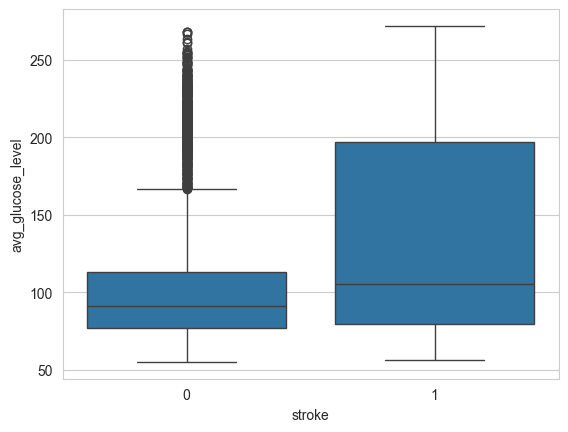

In [2815]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)

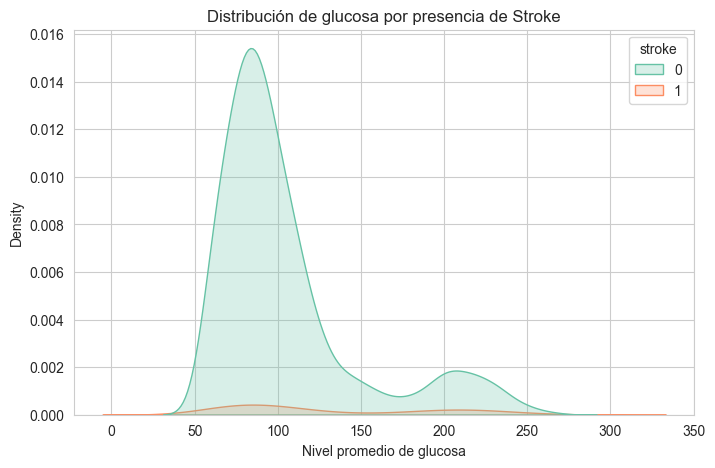

In [2816]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, palette='Set2')
plt.title('Distribuci√≥n de glucosa por presencia de Stroke')
plt.xlabel('Nivel promedio de glucosa')
plt.show()


#### Codificaci√≥n de variables categ√≥ricas

En esta etapa se realiza la codificaci√≥n de variables categ√≥ricas mediante la t√©cnica de one-hot encoding utilizando pd.get_dummies. Este proceso consiste en transformar las variables en nuevas columnas binarias que indican la presencia o ausencia de cada categor√≠a. Se usa el par√°metro drop_first=True para evitar la trampa de las variables ficticias, lo cual elimina una de las categor√≠as por cada variable y evita colinealidad en modelos lineales. Luego, se eliminan las columnas originales. Finalmente, las columnas booleanas resultantes se convierten expl√≠citamente a tipo entero para asegurar compatibilidad con algoritmos de machine learning que no aceptan valores booleanos directamente.

In [2817]:
# Combina el DataFrame original con las variables dummy

df = pd.concat([
    df,
    pd.get_dummies(df['gender'], prefix='gender', drop_first=True),
    pd.get_dummies(df['ever_married'], prefix='married', drop_first=True),
    pd.get_dummies(df['Residence_type'], prefix='residence', drop_first=True),
    pd.get_dummies(df['work_type'], prefix='work', drop_first=True),
    pd.get_dummies(df['smoking_status'], prefix='smoke', drop_first=True)
], axis=1)


# Elimina las columnas originales categ√≥ricas ya que ahora est√°n codificadas como dummie
df.drop(['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'], axis=1, inplace=True)

# Convierte todas las columnas de tipo booleano (True/False) a enteros (1/0)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})



In [2818]:
#Verificar que se realizaron las transformaciones
df.head()

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  28.893237   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Male  married_Yes  residence_Urban  work_Never_worked  \
0       1            1            1                1                  0   
1       1            0            1                0                  0   
2       1            1            1                0                  0   
3       1            0            1                1                  0   
4       1            0            1                0                  0   

   work_Private  work_Self-employed  work_children  smoke_formerly smoked  \
0             1                   0              0                      1   
1             0                   1              0                      0   
2             1                   0              0                      0   
3             1                   0              0                      0   
4             0                   1              0                      0   

   smoke_never smoked  smoke_smokes  
0                   0             0  
1                   1             0  
2                   1             0  
3                   0             1  
4                   1             0

In [2819]:
#Antes de realizar correlaciones, eliminamos la columna id ya que no es significativo en el an√°lisis
df.drop('id',axis=1,inplace=True)

#### Matriz de correlaci√≥n con valores p

En esta secci√≥n se calcul√≥ una matriz de correlaci√≥n de Pearson entre todas las variables num√©ricas del dataset, incluyendo aquellas codificadas mediante one-hot encoding. Adem√°s de los coeficientes de correlaci√≥n ùëü, tambi√©n se calcularon los valores-p asociados a cada par, utilizando la funci√≥n stats.pearsonr de scipy, lo que permite evaluar la significancia estad√≠stica de cada correlaci√≥n. Para facilitar su interpretaci√≥n, se gener√≥ un mapa de calor que muestra en cada celda el valor de ùëü junto con su correspondiente p-value en notaci√≥n cient√≠fica.

Este an√°lisis no solo permite identificar relaciones lineales entre variables, sino tambi√©n determinar qu√© correlaciones son estad√≠sticamente significativas (p < 0.05).Se puede observar que ciertas variables relacionadas con el estado de salud como hipertenci√≥n, niveles de glucosa y otras **tienen correlaciones d√©biles pero significativas con la variable stroke**, lo cual es coherente con el comportamiento cl√≠nico esperado, ya que en medicina, se sabe que la hipertensi√≥n, la diabetes y las enfermedades card√≠acas aumentan el riesgo de ACV, pero no son los √∫nicos factores. Por tanto, no esperamos una correlaci√≥n perfecta o fuerte (porque hay muchas otras causas), pero s√≠ esperamos ver alguna asociaci√≥n.

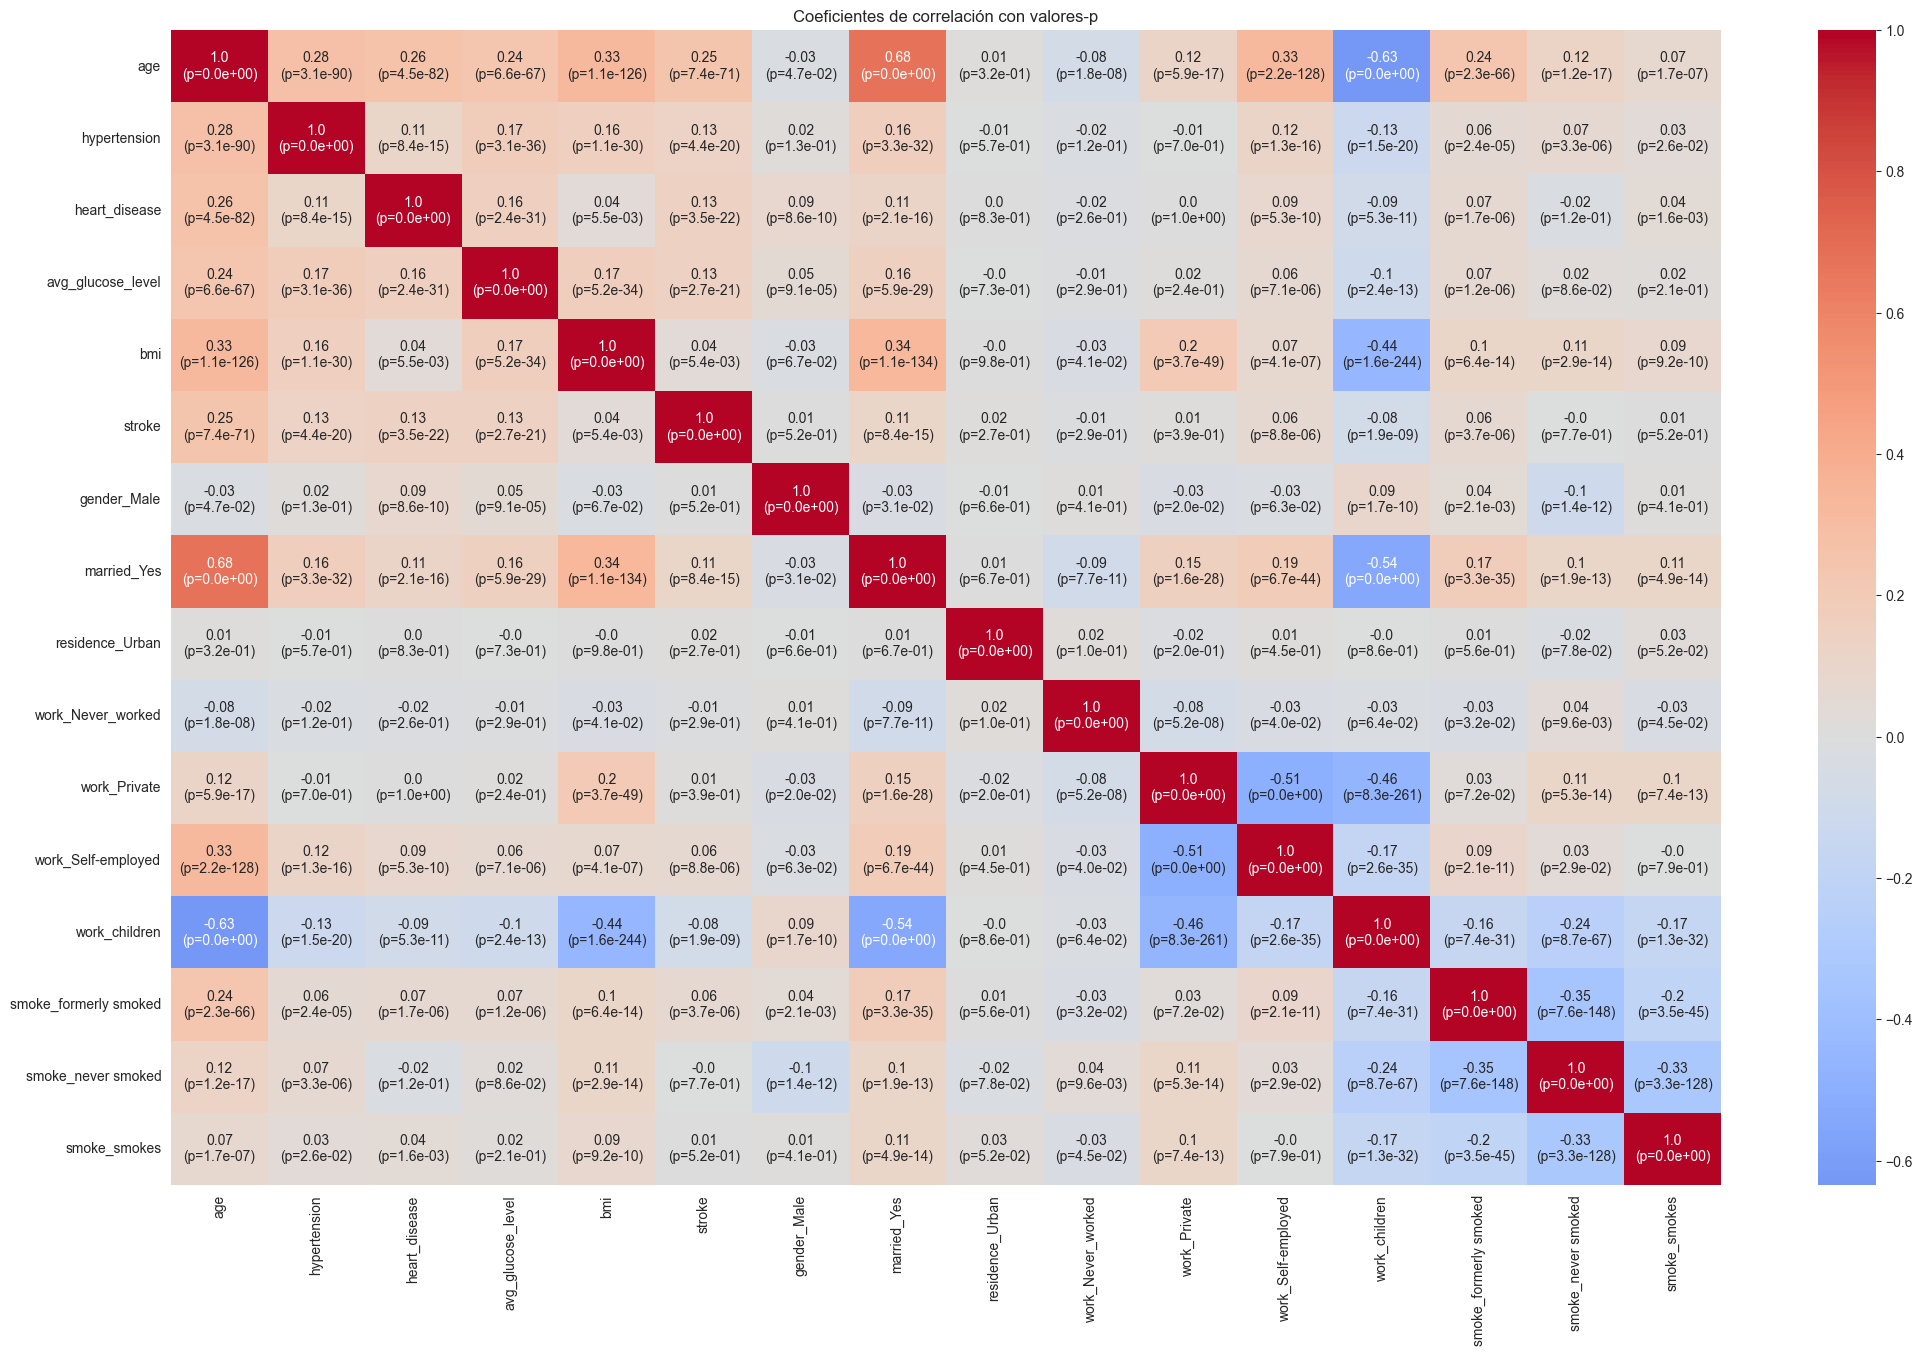

In [2820]:
from scipy import stats

#Funci√≥n para crear matriz de correlaci√≥n con p-valores y coeficientes de correlaci√≥n
def corr_pvalues(data):
    data = data.dropna()
    df_cols = data.select_dtypes(include=[np.number]).columns
    pvals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    r_vals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    for col1 in df_cols:
        for col2 in df_cols:
            r, p = stats.pearsonr(data[col1], data[col2])
            pvals.loc[col1, col2] = p
            r_vals.loc[col1, col2] = r
    return r_vals, pvals

r_vals, p_vals = corr_pvalues(df)

#Notaci√≥n cient√≠fica para los p-valores
annot = r_vals.round(2).astype(str) + "\n(p=" + p_vals.applymap(lambda x: f"{x:.1e}") + ")"

#Tama√±o
plt.figure(figsize=(25, 15))

#Mapa de calor
sns.heatmap(r_vals.astype(float), annot=annot, fmt='', cmap='coolwarm', center=0)

#T√≠tulo
plt.title('Coeficientes de correlaci√≥n con valores-p')

#Mostrar gr√°fico
plt.show()

A partir de los resultados obtenidos en la matriz de correlaci√≥n, se extrajeron espec√≠ficamente los coeficientes ùëü r y los valores-p asociados a la variable objetivo stroke, con el fin de determinar qu√© variables est√°n significativamente correlacionadas con ella.

Estas **variables con correlaciones significativas**, aunque de magnitud d√©bil en muchos casos, **ser√°n tomadas con mayor atenci√≥n en el proceso de modelado**, ya que presentan una evidencia estad√≠stica real de asociaci√≥n con la ocurrencia de un accidente cerebrovascular. Por otro lado, aquellas variables sin correlaci√≥n significativa las consideraremos candidatas a ser descartadas o recibir menos prioridad en la selecci√≥n de variables predictoras.

In [2821]:
alpha = 0.05

#Obtener los p-valores relacionados con 'strokes'
stroke_pvals = p_vals['stroke'].drop('stroke')  
stroke_corrs = r_vals['stroke'].drop('stroke')

#Variables significativamente correlacionadas
significativas = stroke_pvals[stroke_pvals < alpha]

#Variables no significativamente correlacionadas
no_significativas = stroke_pvals[stroke_pvals >= alpha]

#Imprimir lista
print("Variables con correlaci√≥n significativa con 'stroke':\n")
for var in significativas.index:
    print(f"- {var}: r = {stroke_corrs[var]:.2f}, p = {stroke_pvals[var]:.3e}")

#Imprimir lista
print("\nVariables SIN correlaci√≥n significativa con 'stroke':\n")
for var in no_significativas.index:
    print(f"- {var}: r = {stroke_corrs[var]:.2f}, p = {stroke_pvals[var]:.3e}")


Variables con correlaci√≥n significativa con 'stroke':

- age: r = 0.25, p = 7.435e-71
- hypertension: r = 0.13, p = 4.441e-20
- heart_disease: r = 0.13, p = 3.507e-22
- avg_glucose_level: r = 0.13, p = 2.705e-21
- bmi: r = 0.04, p = 5.407e-03
- married_Yes: r = 0.11, p = 8.368e-15
- work_Self-employed: r = 0.06, p = 8.767e-06
- work_children: r = -0.08, p = 1.911e-09
- smoke_formerly smoked: r = 0.06, p = 3.709e-06

Variables SIN correlaci√≥n significativa con 'stroke':

- gender_Male: r = 0.01, p = 5.164e-01
- residence_Urban: r = 0.02, p = 2.706e-01
- work_Never_worked: r = -0.01, p = 2.874e-01
- work_Private: r = 0.01, p = 3.940e-01
- smoke_never smoked: r = -0.00, p = 7.661e-01
- smoke_smokes: r = 0.01, p = 5.238e-01


## 2. Entrenamiento del modelo

In [2822]:
#Visualizar el nombre de las columnas para evitar errores
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'married_Yes', 'residence_Urban',
       'work_Never_worked', 'work_Private', 'work_Self-employed',
       'work_children', 'smoke_formerly smoked', 'smoke_never smoked',
       'smoke_smokes'],
      dtype='object')

En esta secci√≥n se seleccionan las variables predictoras que ser√°n utilizadas para entrenar el modelo. Las columnas incluidas en X corresponden a aquellas que previamente mostraron una correlaci√≥n significativa con la variable objetivo stroke. Por su parte, la variable y contiene la columna stroke, que indica si el individuo ha sufrido un accidente cerebrovascular o no.

In [ ]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','married_Yes',
            'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
y = df['stroke']

A continuaci√≥n, se divide el conjunto de datos en entrenamiento y prueba utilizando la funci√≥n train_test_split. Dado que la variable objetivo est√° altamente desbalanceada, **se aplica la t√©cnica SMOTE (Synthetic Minority Over-sampling Technique)** sobre los datos de entrenamiento. Esta t√©cnica genera ejemplos sint√©ticos de la clase minoritaria (personas que s√≠ han sufrido un ACV), logrando un conjunto de entrenamiento completamente balanceado. Como resultado, se obtiene un nuevo conjunto donde ambas clases tienen la misma cantidad de observaciones, lo que facilitar√° el aprendizaje del modelo y **evitar√° sesgos hacia la clase mayoritaria**.

In [2824]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())


stroke
0    3888
1    3888
Name: count, dtype: int64


### 2.1 Implementaci√≥n regresi√≥n log√≠stica con descenso de gradiente

#### Fundamentos Matem√°ticos de la Regresi√≥n Log√≠stica con Descenso de Gradiente

---

Dado un vector de caracter√≠sticas $ \mathbf{x} \in \mathbb{R}^n $, pesos $ \mathbf{w} \in \mathbb{R}^n $, y un sesgo $ b \in \mathbb{R} $, se calcula:

$$
z = \mathbf{w}^\top \mathbf{x} + b
$$

---

La probabilidad estimada de que $ y = 1 $ est√° dada por la **funci√≥n sigmoide**:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Esto transforma la salida del modelo lineal en una probabilidad entre 0 y 1.

---

**Funci√≥n de p√©rdida log√≠stica (log-loss)**

La funci√≥n de p√©rdida que se quiere minimizar es la **log-loss**:

$$
\mathcal{L}(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

donde:

- $ \hat{y}^{(i)} = \sigma(\mathbf{w}^\top \mathbf{x}^{(i)} + b) $
- $ m $ es el n√∫mero de ejemplos de entrenamiento
- $ y^{(i)} \in \{0, 1\} $

---

**C√°lculo del gradiente**

Para minimizar la p√©rdida, usamos **descenso de gradiente**, que requiere las derivadas parciales de la funci√≥n de p√©rdida respecto a $ \mathbf{w} $ y $ b $:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{y}} - \mathbf{y})
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

---

**Actualizaci√≥n de par√°metros**

Los par√°metros del modelo se actualizan iterativamente con las siguientes f√≥rmulas:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{w}}, \quad
b := b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

donde $ \alpha $ es la **tasa de aprendizaje** (*learning rate*).

---

**Predicci√≥n**

Una vez entrenado el modelo, se puede predecir la probabilidad de clase positiva como:

$$
\hat{y} = \sigma(\mathbf{w}^\top \mathbf{x} + b)
$$

Y para convertir esta probabilidad en una **predicci√≥n binaria** (0 o 1), se aplica un **umbral de decisi√≥n** de 0.5:

$$
\hat{y}_{\text{clase}} =
\begin{cases}
1 & \text{si } \hat{y} \geq 0.5 \\
0 & \text{si } \hat{y} < 0.5
\end{cases}
$$

---


In [2825]:
class LogisticRegressionGradientDescent:
    def __init__(self, n_iterations=1000, learning_rate=0.01):
        self.weights = None
        self.intercept = None
        self.n_iterations = n_iterations
        self.lr = learning_rate
        self.errors = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y_true, y_pred):
        # Log loss (funci√≥n de p√©rdida log√≠stica)
        epsilon = 1e-15  # para evitar log(0)
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def _gradient_descent(self, X, y_true, y_pred):
        n_samples = X.shape[0]
        dw = np.dot(X.T, (y_pred - y_true)) / n_samples
        db = np.sum(y_pred - y_true) / n_samples
        self.weights -= self.lr * dw
        self.intercept -= self.lr * db

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.intercept = 0

        for _ in range(self.n_iterations):
            linear_output = np.dot(X, self.weights) + self.intercept
            y_pred = self._sigmoid(linear_output)
            loss = self._loss(y, y_pred)
            self.errors.append(loss)
            self._gradient_descent(X, y, y_pred)

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.weights) + self.intercept)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)






#### Probando modelos con escalado de variables

In [2826]:
# Escalar datos primero
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [2827]:
# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)


In [2828]:
#Predecir
y_pred = model.predict(X_test_scaled)


In [2829]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

Accuracy: 0.7407045009784736
Matriz de confusi√≥n:
 [[719 253]
 [ 12  38]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.74      0.81      1022



In [2830]:
X = df[['age','hypertension','heart_disease','bmi','married_Yes',
           'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
#X = df.drop(columns=['stroke'])
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7064579256360078
Matriz de confusi√≥n:
 [[683 289]
 [ 11  39]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.12      0.78      0.21        50

    accuracy                           0.71      1022
   macro avg       0.55      0.74      0.51      1022
weighted avg       0.94      0.71      0.79      1022



In [2831]:
X = df.drop(columns=['stroke'])
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.8062622309197651
Matriz de confusi√≥n:
 [[793 179]
 [ 19  31]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.15      0.62      0.24        50

    accuracy                           0.81      1022
   macro avg       0.56      0.72      0.56      1022
weighted avg       0.94      0.81      0.86      1022



In [ ]:
df.col

In [ ]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','married_Yes',
            'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

In [2832]:
# plt.plot(model.errors)
# plt.title("Curva de p√©rdida log√≠stica")
# plt.xlabel("Iteraciones")
# plt.ylabel("Log loss")
# plt.grid(True)
# plt.show()

#### Probando modelos sin escalado de variables

In [2833]:
X = df.drop(columns=['stroke'])
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
# model.fit(X_train_scaled, y_train_balanced.values)
model.fit(X_train_balanced, y_train_balanced.values)

# Predecir
# y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.8845401174168297
Matriz de confusi√≥n:
 [[880  92]
 [ 26  24]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       972
           1       0.21      0.48      0.29        50

    accuracy                           0.88      1022
   macro avg       0.59      0.69      0.61      1022
weighted avg       0.93      0.88      0.91      1022



In [2834]:
X = df[['age','hypertension','heart_disease','bmi','married_Yes',
          'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
# model.fit(X_train_scaled, y_train_balanced.values)
model.fit(X_train_balanced, y_train_balanced.values)

# Predecir
# y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.9481409001956947
Matriz de confusi√≥n:
 [[967   5]
 [ 48   2]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.29      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



In [2835]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','married_Yes',
             'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
# model.fit(X_train_scaled, y_train_balanced.values)
model.fit(X_train_balanced, y_train_balanced.values)

# Predecir
# y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.8835616438356164
Matriz de confusi√≥n:
 [[879  93]
 [ 26  24]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       972
           1       0.21      0.48      0.29        50

    accuracy                           0.88      1022
   macro avg       0.59      0.69      0.61      1022
weighted avg       0.93      0.88      0.90      1022

